In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [36]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

In [37]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [38]:
result = pd.concat([data,test])
result.columns=['age','workclass','fnlwgt','education','education-num','marital-status',
'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','makes 50 or not']

In [39]:
result

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,makes 50 or not
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [42]:
from sklearn import preprocessing
LE1 = preprocessing.LabelEncoder()
LE1.fit(result['workclass'])
data[1]=LE1.transform(data[1])
test[1]=LE1.transform(test[1])
LE1.classes_

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [10]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,4,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,4,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,6,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,4,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,4,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [43]:
LE3 = preprocessing.LabelEncoder()
LE3.fit(result['education'])
data[3]=LE3.transform(data[3])
test[3]=LE3.transform(test[3])

In [45]:
LE5 = preprocessing.LabelEncoder()
LE5.fit(result['marital-status'])
data[5]=LE5.transform(data[5])
test[5]=LE5.transform(test[5])

In [46]:
LE6 = preprocessing.LabelEncoder()
LE6.fit(result['occupation'])
data[6]=LE6.transform(data[6])
test[6]=LE6.transform(test[6])
LE6.classes_

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [47]:
LE7 = preprocessing.LabelEncoder()
LE7.fit(result['relationship'])
data[7]=LE7.transform(data[7])
test[7]=LE7.transform(test[7])
LE7.classes_

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

In [48]:
LE8 = preprocessing.LabelEncoder()
LE8.fit(result['race'])
data[8]=LE8.transform(data[8])
test[8]=LE8.transform(test[8])
LE8.classes_

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

In [49]:
LE9 = preprocessing.LabelEncoder()
LE9.fit(result['sex'])
data[9]=LE9.transform(data[9])
test[9]=LE9.transform(test[9])
LE9.classes_

array([' Female', ' Male'], dtype=object)

In [51]:
LE13 = preprocessing.LabelEncoder()
LE13.fit(result['native-country'])
data[13]=LE13.transform(data[13])
test[13]=LE13.transform(test[13])
LE13.classes_

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [52]:
LE14 = preprocessing.LabelEncoder()
LE14.fit(result['makes 50 or not'])
data[14]=LE14.transform(data[14])
test[14]=LE14.transform(test[14])
LE14.classes_

array([' <=50K', ' <=50K.', ' >50K', ' >50K.'], dtype=object)

In [54]:
data.columns=['age','workclass','fnlwgt','education','education-num','marital-status',
'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','makes 50 or not']
test.columns=['age','workclass','fnlwgt','education','education-num','marital-status',
'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','makes 50 or not']

In [56]:
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,makes 50 or not
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,1
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,1
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,3
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,3
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,1
5,34,4,198693,0,6,4,8,1,4,1,0,0,30,39,1
6,29,0,227026,11,9,4,0,4,2,1,0,0,40,39,1
7,63,6,104626,14,15,2,10,0,4,1,3103,0,32,39,3
8,24,4,369667,15,10,4,8,4,4,0,0,0,40,39,1
9,55,4,104996,5,4,2,3,0,4,1,0,0,10,39,1


In [59]:
a = data.corr('pearson')
abs(a.loc['makes 50 or not']).sort_values()

fnlwgt             0.009463
native-country     0.015840
workclass          0.051604
race               0.071846
occupation         0.075468
education          0.079317
capital-loss       0.150526
marital-status     0.199307
sex                0.215980
capital-gain       0.223329
hours-per-week     0.229689
age                0.234037
relationship       0.250918
education-num      0.335154
makes 50 or not    1.000000
Name: makes 50 or not, dtype: float64

In [24]:
'''We have to predict whether a person makes over 50 k
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'''

'age: continuous.\nworkclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\nfnlwgt: continuous.\neducation: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.\neducation-num: continuous.\nmarital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.\noccupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.\nrelationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.\nrace: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.\nsex: Female, Male.\ncapital-gain: continuous.\ncapital-loss: continuous.\nhours-per-week: continuous.\nnative-country: United-States, Cambodia, Engl

In [25]:
data.describe()#this to know whether there is 0 value in any feature i.e missing data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.481619
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.855163
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,2.000000


In [61]:
x1=np.array(data['capital-gain'])
x2=np.array(data['hours-per-week'])
y=np.array(data['makes 50 or not'])
x = np.column_stack((x1,x2))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


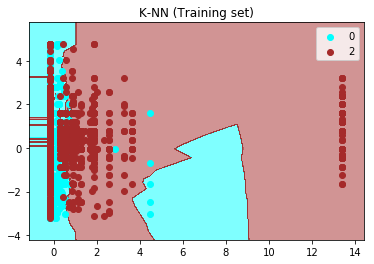

In [67]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('aqua','brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua','brown'))(i), label = j)
plt.title('K-NN (Training set)')

plt.legend()
